In [1]:
pip install pandas statsmodels matplotlib


Note: you may need to restart the kernel to use updated packages.


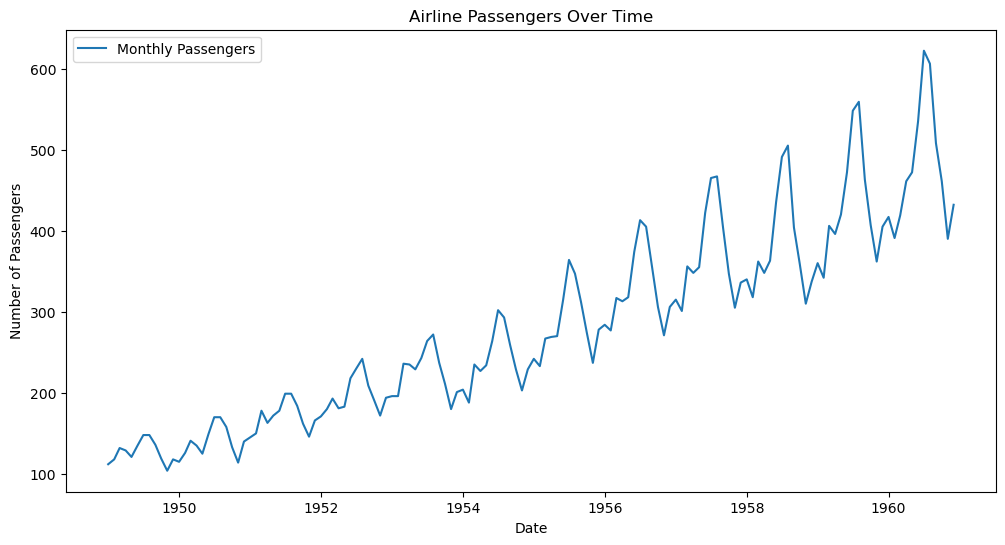

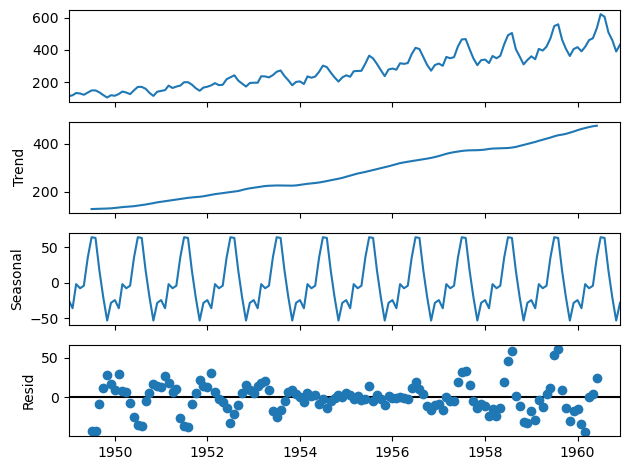

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


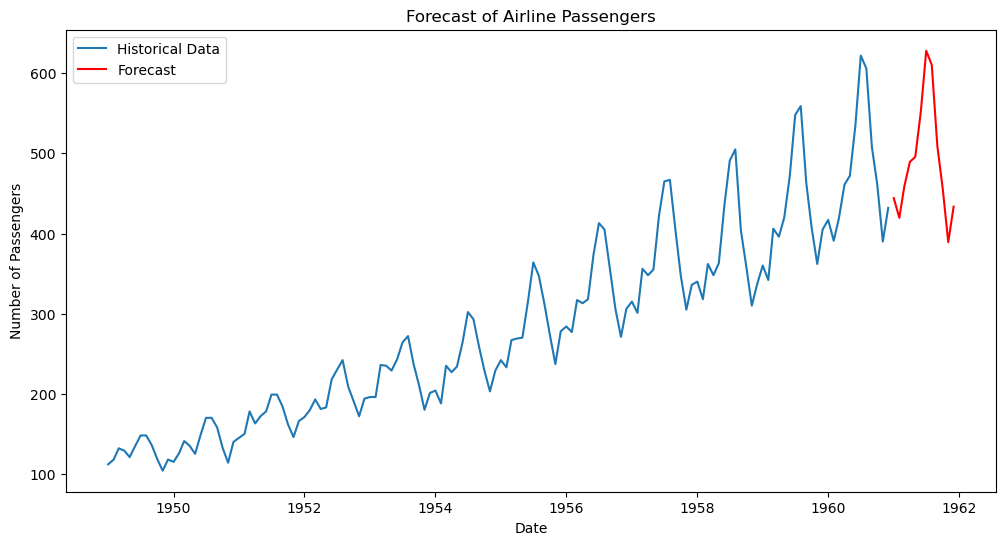

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data, label='Monthly Passengers')
plt.title('Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(data, model='additive')
decomposition.plot()
plt.show()

# Forecast using Holt-Winters method
model = ExponentialSmoothing(data, seasonal='additive', seasonal_periods=12).fit()
forecast = model.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label='Historical Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Forecast of Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [3]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Sample movie reviews data
data = {
    'reviews': [
        'I love this movie, it was amazing!',
        'This film was terrible and boring.',
        'What a great film, I really enjoyed it!',
        'It was okay, not the best but not the worst.',
        'Absolutely fantastic! Highly recommend it.',
        'I did not like it at all, waste of time.'
    ]
}

df = pd.DataFrame(data)

# Initialize the Sentiment Intensity Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
df['sentiment'] = df['reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display results
print(df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


                                        reviews  sentiment
0            I love this movie, it was amazing!     0.8516
1            This film was terrible and boring.    -0.6597
2       What a great film, I really enjoyed it!     0.8395
3  It was okay, not the best but not the worst.     0.5729
4    Absolutely fantastic! Highly recommend it.     0.8043
5      I did not like it at all, waste of time.    -0.6007


In [5]:
pip install scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


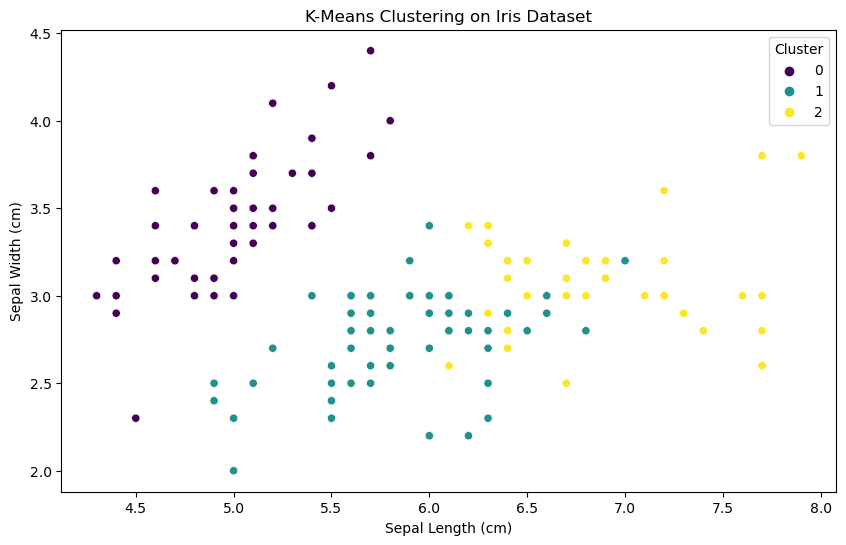

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(data.iloc[:, :-1])

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster', data=data, palette='viridis')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Cluster')
plt.show()
